In [197]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

customer_df = pd.read_json('dim_customer.json')
invoice_df = pd.read_csv('fct_invoice.csv')

EASY

1. How many unique customers are in the dataset?

In [46]:
customer_amount = customer_df['id'].nunique()

print (f'unique customers: {customer_amount}')

unique customers: 5191


2. What are the different categories of products available? How many unique categories are there?

In [57]:
category_types = invoice_df ['category'].unique()
category_types_str = ', '.join(category_types)
category_amount = invoice_df['category'].nunique()

print(f'different category types: {category_types_str}')
print (f'amount of unique categories: {category_amount}')

Different category types: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
Amount of unique categories: 8


3. Which payment method is the most popular? How many times was it used?

In [73]:
most_popular_payment_method = invoice_df['payment_method'].mode()[0]
popular = invoice_df[invoice_df['payment_method'] == 'Cash']
popular_amount = popular['payment_method'].count()

print (f'most popular payment method: {most_popular_payment_method}')
print (f'amount used: {popular_amount}')

most popular payment method: Cash
amount used: 44447


MEDIUM

1. What are the three most popular categories, by total sales?

In [137]:
invoice_df['total_sales'] = invoice_df['quantity'] * invoice_df['price']
popular_sales = invoice_df.groupby(by =['category']).sum()['total_sales'].sort_values(ascending = False)
top_three = popular_sales.head(3).index
top_three_str = ', '.join(top_three)

print (f'the top three most popular categories by total sales in order: {top_three_str}')

the top three most popular categories by total sales in order: Clothing, Shoes, Technology


2. What are the total sales attributed to customers over the age of 45?



In [249]:
invoice_df['total_sales'] = invoice_df['quantity'] * invoice_df['price']

merged_df = pd.merge(customer_df, invoice_df, left_on = 'id' , right_on = 'customer_id')

age_filter = merged_df[merged_df['age'] > 45]

total_sales_age_sum = age_filter['total_sales'].sum()

print(f' total sales attributed to customers over the age of 45: {total_sales_age_sum}')

 total sales attributed to customers over the age of 45: 82039768.14999999


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

Text(0, 0.5, 'Number of Invoices')

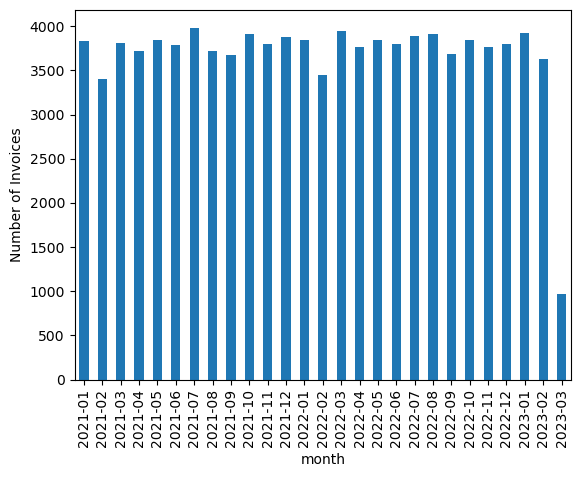

In [265]:

invoice_df['total_sales'] = invoice_df['quantity'] * invoice_df['price']

invoice_df['invoice_date'] = pd.to_datetime(invoice_df['invoice_date'],format='%d/%m/%Y')

invoice_df['month'] = invoice_df['invoice_date'].dt.to_period('M')

#monthly_sales = invoice_df.groupby('month')['total_sales'].sum()

monthly_sales = invoice_df.groupby('month')['quantity'].size()

monthly_sales.columns = ['Month', 'Total_sales']

#print(monthly_sales.columns)

graph = monthly_sales.plot(x='Month', y='Total_sales', kind="bar") 

graph.set_ylabel('Number of Invoices')


The graph displays the number of invoices per month. 

We can observe that transactions peaked during the months of January, March, July, August, and October. We can make an inference that the sales of the months of January are influenced by post-holiday sales and New Year purchases. Sales from the month of March may be influenced by the spring season and spring related sales. July and August sales may be related caused by the mid-year sales which typically occur during these months. October sales may be in preparation for the Holiday season.

It can also be seen that sales drop during the month of February, with February 2021 and 2022 having the lowest amount of transactinos among the data set (besides March 2023 which we can assume is incomplete) 

HARD

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [274]:
invoice_df['total_sales'] = invoice_df['quantity'] * invoice_df['price']
merged_df = pd.merge(customer_df, invoice_df, left_on = 'id' , right_on = 'customer_id')

bins = [10,20,30,40,50,60,70,80,90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged_df['age_ranges'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

merged_df.pivot_table(index = 'category',columns='age_ranges', values = 'total_sales', aggfunc='sum')

age_ranges,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80
